In [113]:
# Dependencies and Setup
%matplotlib inline
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

In [114]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_data)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [115]:
# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_trial_data = pd.read_csv(clinical_data) 
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [116]:
# Combine the data into a single dataset
cancer_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")
cancer_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [117]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint = cancer_data.groupby(["Drug", "Timepoint"])
mean_volume = drug_timepoint["Tumor Volume (mm3)"].mean()

In [118]:
# Preview DataFrame
mean_tumor_volume = pd.DataFrame(mean_volume)
mean_tumor_volume = mean_tumor_volume.reset_index()

In [119]:

# Convert to DataFrame
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [120]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sem.html

drug_timepoint = cancer_data.groupby(["Drug", "Timepoint"])

tv_error = drug_timepoint["Tumor Volume (mm3)"].sem()

In [121]:
# Convert to DataFrame
tv_error = pd.DataFrame(tv_error)
tv_standard_error = tv_standard_error.reset_index()

In [122]:
# Preview DataFrame
tv_standard_error.head(10)

,level_0,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,0,Capomulin,0,0.000000
1,1,1,Capomulin,5,0.448593
2,2,2,Capomulin,10,0.702684
3,3,3,Capomulin,15,0.838617
4,4,4,Capomulin,20,0.909731
5,5,5,Capomulin,25,0.881642
6,6,6,Capomulin,30,0.934460
7,7,7,Capomulin,35,1.052241
8,8,8,Capomulin,40,1.223608
9,9,9,Capomulin,45,1.223977


In [123]:
# Minor Data Munging to Re-Format the Data Frames
#https://towardsdatascience.com/data-wrangling-with-pandas-5b0be151df4e
#index='Timepoint',columns='Drug',values='Tumor Volume (mm3)'
tumor_volume_pivot = mean_tumor_volume.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

In [124]:
# Preview that Reformatting worked
tumor_volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


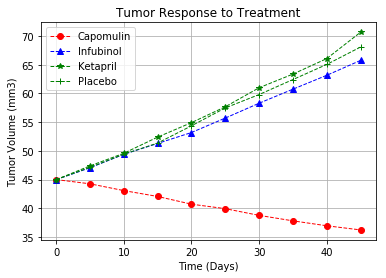

In [125]:
# Generate the Plot (with Error Bars)

#yerror = tv_standard_error["Drug"]["Tumor Volume (mm3)"]["Camopulin"]
camopulin_tumor_response  = plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Capomulin"], fmt="o", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

infubinol_tumor_response = plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Infubinol"], fmt="^", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

ketapril_tumor_response = plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Ketapril"], fmt="*", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")

placebo_tumor_response = plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Placebo"], fmt="+", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")

# Creating titles and labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

plt.legend((camopulin_tumor_response, infubinol_tumor_response, ketapril_tumor_response, placebo_tumor_response), 
           ("Capomulin", "Infubinol", "Ketapril", "Placebo"))

plt.show()

In [169]:
# Save the figure 
plt.savefig("Tumor Response to Treatment.png")

<Figure size 432x288 with 0 Axes>

## Metastatic Response to Treatment

In [127]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

drug_timepoint = cancer_data.groupby(["Drug", "Timepoint"])

mean_met = drug_timepoint["Metastatic Sites"].mean()

In [128]:
# Convert to DataFrame
mean_met_sites = pd.DataFrame(mean_met)
mean_met_sites = mean_met_sites.reset_index()

In [129]:
# Preview DataFrame
mean_met_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [130]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_timepoint = cancer_data.groupby(["Drug", "Timepoint"])

met_error = drug_timepoint[("Metastatic Sites")].sem()

In [131]:
# Convert to DataFrame
met_sites_error = pd.DataFrame(met_error)


In [132]:
# Preview DataFrame
met_sites_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [133]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_sites_pivot = mean_met_sites.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

In [134]:
# Preview that Reformatting worked
mean_met_sites_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [135]:
# I think they placed the table from the previous step in this cell 

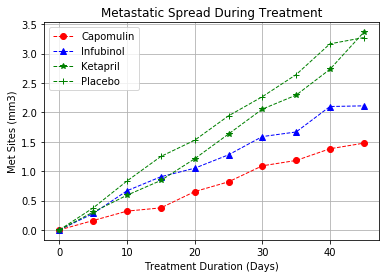

In [136]:
# Generate the Plot (with Error Bars)

#yerror = 
camopulin_met_response  = plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Capomulin"], fmt="o", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

infubinol_met_response = plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Infubinol"], fmt="^", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

ketapril_met_response = plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Ketapril"], fmt="*", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")

placebo_met_response = plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Placebo"], fmt="+", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites (mm3)")
plt.grid()

plt.legend((camopulin_met_response, infubinol_met_response, ketapril_met_response, placebo_met_response), 
           ("Capomulin", "Infubinol", "Ketapril", "Placebo"))

# Show the Figure
plt.show()

In [170]:
# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")

<Figure size 432x288 with 0 Axes>

## Survival Rates

In [138]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric
drug_timepoint = cancer_data.groupby(["Drug", "Timepoint"])
mouse_id = drug_timepoint[("Mouse ID")].count()


In [139]:
# Convert to DataFrame
mouse_id_count = pd.DataFrame(mouse_id)
mouse_id_count = mouse_id_count.reset_index()

mouse_id_count = mouse_id_count.rename(columns={"Mouse ID":"Mouse Count"})


In [140]:
# Preview DataFrame
mouse_id_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [141]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = mouse_id_count.pivot(index="Timepoint", columns="Drug", values="Mouse Count")


In [142]:
# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


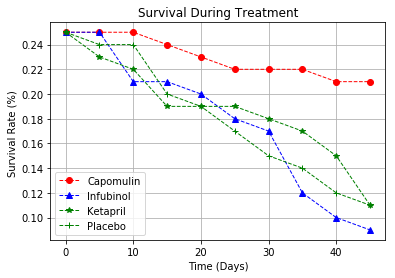

In [143]:
# Generate the Plot (Accounting for percentages)
camopulin_survival_rate  = plt.errorbar(mouse_count_pivot.index, (mouse_count_pivot["Capomulin"]/100), fmt="o", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

infubinol_survival_rate = plt.errorbar(mouse_count_pivot.index, (mouse_count_pivot["Infubinol"])/100, fmt="^", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

ketapril_survival_rate = plt.errorbar(mouse_count_pivot.index, (mouse_count_pivot["Ketapril"]/100), fmt="*", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")

placebo_survival_rate = plt.errorbar(mouse_count_pivot.index, (mouse_count_pivot["Placebo"]/100), fmt="+", 
                    ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()

plt.legend((camopulin_survival_rate, infubinol_survival_rate, ketapril_survival_rate, placebo_survival_rate), 
           ("Capomulin", "Infubinol", "Ketapril", "Placebo"))

# Show the Figure
plt.show()

In [171]:
# Save the Figure
plt.savefig("Survival During Treatment.png")

<Figure size 432x288 with 0 Axes>

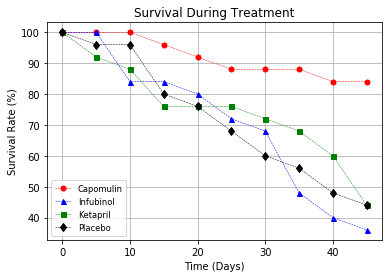

## Summary Bar Graph

In [162]:
# Calculate the percent changes for each drug
percent_change = (tumor_volume_pivot.iloc[-1]/(tumor_volume_pivot.iloc[0])-1)*100

percent_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [163]:
# Store all Relevant Percent Changes into a Tuple

drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
drug_percent_change = [(percent_change["Capomulin"]), percent_change["Infubinol"], percent_change["Ketapril"], percent_change["Placebo"]]



In [164]:
# Splice the data between passing and failing drugs
passing = percentage_change < 0

Text(0.5, 1.0, 'Tumor Change over 45 Day Treatment')

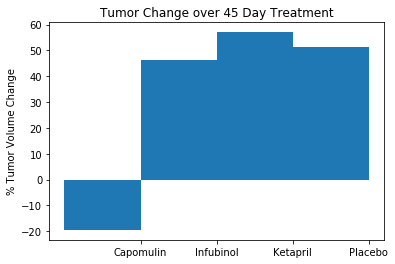

In [167]:
# Orient widths. Add labels, tick marks, etc. 
drug_percent_change_plot = plt.bar(drugs,drug_percent_change, width=-1, align='edge')

plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')